In [2]:
import mido
from mido import MidiFile, MidiTrack

In [3]:
mid = MidiFile('/Users/snikolov/Downloads/midicsv-1.1/test.mid')

<midi file '/Users/snikolov/Downloads/midicsv-1.1/test.mid' type 1, 2 tracks, 47 messages>

In [17]:
track = mid.tracks[1]

In [18]:
message = track[2]

In [101]:
TRACK_TIME_EVENTS = ['note_on', 'note_off', 'end_of_track']

In [173]:
def quantize_note_on(tick, resolution, quantization):
    ticks_per_quantum = (resolution * 4) / 2 ** quantization
    quantized_ticks = int(round(tick / float(ticks_per_quantum)) * ticks_per_quantum)
    return quantized_ticks

In [117]:
import numpy as np

def get_quantized_note_times(track, ticks_per_beat, quantization):
    # In MIDI files, note event timing is differential. To make things
    # simpler, create a list of cumulative note_on and note_off event times.
    # Track 1 has the note events.
    note_times = [ msg.time for msg in track 
                   if msg.type in TRACK_TIME_EVENTS ]
    note_types = [ msg.type for msg in track
                   if msg.type in TRACK_TIME_EVENTS ]
    cum_note_times = np.cumsum(np.array(note_times))
    quantized_cum_note_times = []
    for cum_note_time, note_time, note_type in zip(cum_note_times, note_times, note_types):
        if note_type == 'note_on':
            quantized_cum_note_times.append(
                quantize_note_on(cum_note_time, ticks_per_beat, quantization))
        else:
            quantized_cum_note_times.append(cum_note_time)

    quantized_note_times = [0] + [ max(delta, 0) for delta in np.diff(np.array(quantized_cum_note_times)) ]
    return quantized_note_times

In [170]:
import numpy as np

def quantize(mid, quantization=4):
    quantized_mid = copy.deepcopy(mid)
    # By convention, Track 0 contains metadata and Track 1 contains
    # the note on and note off events.
    track = MidiTrack()
    quantized_mid.tracks[1] = track

    quantized_note_times = get_quantized_note_times(
        mid.tracks[1], mid.ticks_per_beat, quantization)
    quantized_note_times.reverse()
   
    for msg in mid.tracks[1]:        
        if msg.type in TRACK_TIME_EVENTS:
            quantized_note_time = quantized_note_times.pop()
            track.append(msg.copy(time=quantized_note_time))
        else:
            track.append(msg.copy())
    return quantized_mid
        

In [172]:
mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/Breakbeats/090 BPM New York/090 New York A.mid')
quantized_mid = quantize(mid, quantization=5)
quantized_mid.save('/Users/snikolov/Dropbox/projects/neural-beats/_090 New York A.mid')

0 0 30
0 0 30
30 30 30
30 30 30
119 120 30
122 120 30
149 150 30
152 150 30
240 240 30
244 240 30
270 270 30
274 270 30
361 360 30
391 390 30
479 480 30
509 510 30
602 600 30
605 600 30
632 630 30
635 630 30
663 660 30
693 690 30
721 720 30
722 720 30
751 750 30
752 750 30
844 840 30
874 870 30
910 900 30
940 930 30
957 960 30
960 960 30
987 990 30
990 990 30
1079 1080 30
1081 1080 30
1109 1110 30
1111 1110 30
1199 1200 30
1203 1200 30
1229 1230 30
1233 1230 30
1324 1320 30
1354 1350 30
1390 1380 30
1420 1410 30
1442 1440 30
1472 1470 30
1508 1500 30
1538 1530 30
1561 1560 30
1562 1560 30
1591 1590 30
1592 1590 30
1681 1680 30
1685 1680 30
1711 1710 30
1715 1710 30
1801 1800 30
1831 1830 30
1868 1860 30
1898 1890 30
1916 1920 30
1916 1920 30
1946 1950 30
1946 1950 30
2038 2040 30
2040 2040 30
2068 2070 30
2070 2070 30
2159 2160 30
2161 2160 30
2189 2190 30
2191 2190 30
2282 2280 30
2312 2310 30
2403 2400 30
2433 2430 30
2522 2520 30
2523 2520 30
2552 2550 30
2553 2550 30
2586 2580 30
2

In [120]:
quantized_mid.print_tracks

<bound method MidiFile.print_tracks of <midi file '/Users/snikolov/Downloads/midicsv-1.1/test.mid' type 1, 3 tracks, 87 messages>>

In [140]:
mid.save('/Users/snikolov/Downloads/midicsv-1.1/test_.mid')

In [151]:
np.cumsum([ msg.time for msg in quantized_mid.tracks[1] ])

array([  0,   0,   0,  54,  54,  60, 113, 120, 177, 240, 240, 295, 299,
       300, 300, 358, 360, 361, 413, 420, 479, 480, 534, 540, 594, 600,
       600, 656, 657, 720, 720, 775, 778, 780, 840, 840, 898, 900, 947, 952])

In [150]:
np.cumsum([ msg.time for msg in mid.tracks[1] ])

array([  0,   0,   0,  54,  54,  60, 113, 123, 177, 241, 245, 295, 299,
       304, 307, 358, 359, 361, 413, 425, 479, 480, 534, 540, 594, 602,
       603, 656, 657, 721, 724, 775, 778, 786, 840, 844, 898, 904, 947, 952])

In [143]:
quantized_mid.print_tracks()

=== Track 0
<meta message track_name name=u'093 16ths 08' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=923077 time=0>
<meta message set_tempo tempo=674157 time=0>
<meta message set_tempo tempo=588235 time=0>
<meta message set_tempo tempo=638298 time=0>
<meta message end_of_track time=0>
=== Track 1
<meta message track_name name=u'093 16ths 08' time=0>
<message note_on channel=9 note=42 velocity=96 time=0>
<message note_on channel=9 note=36 velocity=116 time=0>
<message note_off channel=9 note=42 velocity=64 time=54>
<message note_off channel=9 note=36 velocity=64 time=0>
<message note_on channel=9 note=42 velocity=68 time=6>
<message note_off channel=9 note=42 velocity=64 time=53>
<message note_on channel=9 note=46 velocity=91 time=7>
<message note_off channel=9 note=46 velocity=64 time=57>
<message note_on channel=9 note=42 velocity=91 time=63>
<message note_on channel=9 note=38 v

In [178]:
import midi_util

In [222]:
reload(midi_util)
mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/original/World Beats/Drum Set/109 Bossa Nova 04.mid')
note_times = midi_util.quantize_track(mid.tracks[1], mid.ticks_per_beat, 6)
q_mid = midi_util.quantize(mid, quantization=5)
q_mid.save('109 Bossa Nova 04.mid')

note_on channel=9 note=42 velocity=83 time=0
defaultdict(<type 'list'>, {})
note_on channel=9 note=35 velocity=89 time=0
defaultdict(<type 'list'>, {42: [(0, <message note_on channel=9 note=42 velocity=83 time=0>)]})
note_on channel=9 note=44 velocity=99 time=0
defaultdict(<type 'list'>, {42: [(0, <message note_on channel=9 note=42 velocity=83 time=0>)], 35: [(0, <message note_on channel=9 note=35 velocity=89 time=0>)]})
note_on channel=9 note=42 velocity=101 time=106
defaultdict(<type 'list'>, {42: [(0, <message note_on channel=9 note=42 velocity=83 time=0>)], 35: [(0, <message note_on channel=9 note=35 velocity=89 time=0>)], 44: [(0, <message note_on channel=9 note=44 velocity=99 time=0>)]})
note_off channel=9 note=42 velocity=64 time=2
defaultdict(<type 'list'>, {42: [(0, <message note_on channel=9 note=42 velocity=83 time=0>), (106, <message note_on channel=9 note=42 velocity=101 time=106>)], 35: [(0, <message note_on channel=9 note=35 velocity=89 time=0>)], 44: [(0, <message note_

In [213]:
mid.tracks[1]

<midi track u'080 Rock Toms 1 F2' 224 messages>

In [196]:
cum_msgs = zip(np.cumsum([msg.time for msg in msgs]), [msg for msg in msgs])

In [197]:
cum_msgs

[(0, <meta message track_name name=u'080 Rock Toms 1 F2' time=0>),
 (0, <message note_on channel=9 note=38 velocity=112 time=0>),
 (0, <message note_on channel=9 note=36 velocity=113 time=0>),
 (23, <message note_off channel=9 note=38 velocity=64 time=23>),
 (30, <message note_off channel=9 note=36 velocity=64 time=7>),
 (63, <message note_on channel=9 note=48 velocity=106 time=33>),
 (88, <message note_off channel=9 note=48 velocity=64 time=25>),
 (95, <message note_on channel=9 note=48 velocity=100 time=7>),
 (118, <message note_off channel=9 note=48 velocity=64 time=23>),
 (124, <message note_on channel=9 note=45 velocity=100 time=6>),
 (124, <message note_on channel=9 note=36 velocity=101 time=0>),
 (149, <message note_off channel=9 note=45 velocity=64 time=25>),
 (154, <message note_off channel=9 note=36 velocity=64 time=5>),
 (186, <message note_on channel=9 note=43 velocity=89 time=32>),
 (211, <message note_off channel=9 note=43 velocity=64 time=25>),
 (242, <message note_on ch

In [182]:
np.cumsum(note_times)

array([   0,    0,   23,   30,   60,   88,   90,  118,  120,  120,  149,
        154,  180,  211,  240,  240,  271,  272,  300,  329,  360,  360,
        391,  394,  420,  448,  450,  480,  480,  480,  509,  514,  540,
        569,  570,  603,  603,  603,  635,  638,  663,  692,  723,  723,
        751,  757,  783,  814,  814,  845,  845,  845,  874,  878,  905,
        934,  965,  965,  993,  998, 1025, 1054, 1055, 1081, 1085, 1085,
       1114, 1120, 1145, 1174, 1205, 1205, 1234, 1237, 1265, 1298, 1325,
       1325, 1354, 1359, 1385, 1414, 1415, 1446, 1446, 1446, 1477, 1479,
       1506, 1535, 1536, 1569, 1569, 1569, 1598, 1603, 1629, 1658, 1689,
       1689, 1719, 1723, 1749, 1779, 1809, 1809, 1838, 1845, 1869, 1898,
       1899, 1925, 1929, 1929, 1957, 1962, 1989, 2017, 2019, 2047, 2049,
       2049, 2078, 2084, 2109, 2140, 2169, 2169, 2200, 2201, 2229, 2258,
       2289, 2289, 2320, 2323, 2349, 2377, 2379, 2409, 2409, 2409, 2438,
       2443, 2469, 2498, 2499, 2532, 2532, 2532, 25

3

In [207]:
x

[5, 1, 2, 3]

# Convert quantized midi to input vectors

In [224]:
mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/quantized/Funk Hip Hop RB/16ths/093 16ths 08 B.mid')

In [225]:
time_sig = [ msg for msg in mid.tracks[0] if msg.type == 'time_signature'][0]

In [227]:
time_sig.denominator

4

In [234]:
quantization = 5 # 1/32 note grid

In [277]:
from math import log, floor, ceil
# Track length should be normalized to a power of 2 for tracks with 4/4 time signature 

def track_to_vectors(mid, quantization):
    '''Convert track to sequence of vectors.'''
    track = mid.tracks[1]
    ticks_per_quarter = mid.ticks_per_beat
    
    time_msgs = [msg for msg in track if hasattr(msg, 'time')]
    cum_times = np.cumsum([msg.time for msg in time_msgs])
    track_len_ticks = cum_times[-1]
    print 'Track len in ticks:', track_len_ticks
    notes = [
        (time * (2**quantization/4) / (ticks_per_quarter), msg.note, msg.velocity)
        for (time, msg) in zip(cum_times, time_msgs)
        if msg.type == 'note_on' ]
    num_notes = int(round(track_len_ticks / float(ticks_per_quarter)))*2**quantization/4
    normalized_num_notes = nearest_pow2(num_notes)

    vectors = np.zeros((normalized_num_notes, 128))
    for (position, note_num, velocity) in notes:
        vectors[position, note_num] = velocity
    
    return vectors
    
def nearest_pow2(x):
    '''Normalize input to nearest power of 2.'''
    low = 2**int(floor(log(x, 2)))
    high = 2**int(ceil(log(x, 2)))
    if high - x < x - low:
        nearest = high
    else:
        nearest = low
    return nearest

In [278]:
%debug
x = track_to_vectors(mid, 5)

> <ipython-input-275-ac4eb80178c3>(28)nearest_pow2()
     27     '''Normalize input to nearest power of 2.'''
---> 28     low = 2**int(floor(log(x, 2)))
     29     high = 2**int(ceil(log(x, 2)))

ipdb> c
Track len in ticks: 948


In [279]:
x

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

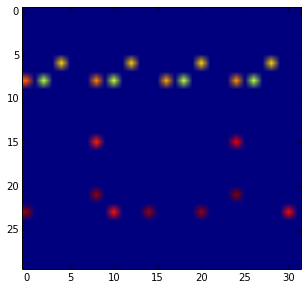

In [65]:
plt.figure(figsize=(5,5))
plt.imshow(np.flipud(A[:,30:60].transpose()))
plt.show()

In [34]:
810/240.

3.375

In [35]:
import midi_util
reload(midi_util)
mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/original/Led Head/100 Hills/Verse Fills/100 S06 Verse 1 Fill 04.mid')
#mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/original/Funk Hip Hop RB/16ths/093 16ths 08 B.mid')
array = midi_util.midi_to_array(mid, 5)

note_on channel=9 note=36 velocity=109 time=0
defaultdict(<type 'list'>, {})
note_on channel=9 note=42 velocity=97 time=11
defaultdict(<type 'list'>, {36: [(0, <message note_on channel=9 note=36 velocity=109 time=0>)]})
note_on channel=9 note=36 velocity=0 time=19
defaultdict(<type 'list'>, {42: [(11, <message note_on channel=9 note=42 velocity=97 time=11>)], 36: [(0, <message note_on channel=9 note=36 velocity=109 time=0>)]})
note_on channel=9 note=42 velocity=0 time=11
defaultdict(<type 'list'>, {42: [(11, <message note_on channel=9 note=42 velocity=97 time=11>)], 36: []})
note_on channel=9 note=36 velocity=91 time=81
defaultdict(<type 'list'>, {42: [], 36: []})
note_on channel=9 note=42 velocity=95 time=3
defaultdict(<type 'list'>, {42: [], 36: [(122, <message note_on channel=9 note=36 velocity=91 time=81>)]})
note_on channel=9 note=36 velocity=0 time=27
defaultdict(<type 'list'>, {42: [(125, <message note_on channel=9 note=42 velocity=95 time=3>)], 36: [(122, <message note_on chann

In [17]:
mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/original/Breakbeats/090 BPM New York/090 New York A.mid')

In [23]:
reload(midi_util)
qmid = midi_util.quantize(mid, quantization=5)

> /Users/snikolov/Dropbox/projects/neural-beats/midi_util.py(49)quantize_track()
-> quantized_track = MidiTrack()
(Pdb) c


In [24]:
qmid.print_tracks()

=== Track 0
<meta message track_name name=u'090 New York A' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=666667 time=0>
<meta message end_of_track time=0>
=== Track 1
<message note_on channel=9 note=42 velocity=79 time=0>
<message note_on channel=9 note=36 velocity=118 time=0>
<message note_on channel=9 note=42 velocity=0 time=30>
<message note_on channel=9 note=36 velocity=0 time=0>
<message note_on channel=9 note=36 velocity=113 time=90>
<message note_on channel=9 note=42 velocity=63 time=0>
<message note_on channel=9 note=36 velocity=0 time=30>
<message note_on channel=9 note=42 velocity=0 time=0>
<message note_on channel=9 note=38 velocity=113 time=90>
<message note_on channel=9 note=42 velocity=72 time=0>
<message note_on channel=9 note=38 velocity=0 time=30>
<message note_on channel=9 note=42 velocity=0 time=0>
<message note_on channel=9 note=42 velocity=60 time=90>
<message 

In [49]:
import os
import numpy as np

num_steps = 0
for root, dirs, files in os.walk('/Users/snikolov/Downloads/groove-monkee-midi-gm/array'):
    for filename in files:
        if filename.split('.')[-1] == 'npy':
            array = np.load(os.path.join(root, filename))
            num_steps += array.shape[0]
            #plt.figure(figsize=(3,10))
            #plt.imshow(array[:,20:60])
            #plt.show()
            
num_steps

27520

# Writeup demos

In [50]:
mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/original/Funk Hip Hop RB/16ths/093 16ths 08 B.mid')

In [52]:
print mid.print_tracks()

=== Track 0
<meta message track_name name=u'093 16ths 08 B' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=923077 time=0>
<meta message set_tempo tempo=674157 time=0>
<meta message set_tempo tempo=588235 time=0>
<meta message set_tempo tempo=638298 time=0>
<meta message end_of_track time=0>
=== Track 1
<meta message track_name name=u'093 16ths 08 B' time=0>
<message note_on channel=9 note=51 velocity=96 time=0>
<message note_on channel=9 note=36 velocity=116 time=0>
<message note_off channel=9 note=51 velocity=64 time=54>
<message note_off channel=9 note=36 velocity=64 time=0>
<message note_on channel=9 note=51 velocity=68 time=5>
<message note_off channel=9 note=51 velocity=64 time=54>
<message note_on channel=9 note=53 velocity=81 time=10>
<message note_off channel=9 note=53 velocity=64 time=54>
<message note_on channel=9 note=51 velocity=91 time=64>
<message note_on channel=9 note

In [74]:
reload(midi_util)
mid = MidiFile('/Users/snikolov/Downloads/groove-monkee-midi-gm/original/Funk Hip Hop RB/16ths/093 16ths 08 B.mid')
A = midi_util.midi_to_array(mid, 5)
B = np.flipud(A[:,30:60].transpose())


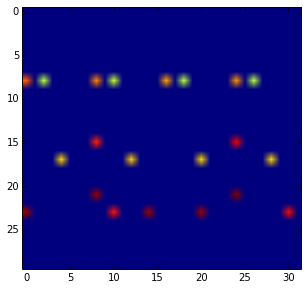

In [86]:
C = B
C[17] = B[6]
C[6] = B[0]
plt.figure(figsize=(5,5))
plt.imshow(C[:, :])
plt.show()